# 2022-12-12

## Performance Summary
Inital p1: 8.9 ms ± 294 µs

Initial p2: 7.02 ms ± 69.9 µs

## Initial solution
Didnt quite have the time to compete today. Started late and had to run errands in between. It was great fun tho!

```
      --------Part 1--------   --------Part 2--------
Day       Time   Rank  Score       Time   Rank  Score
 12   08:32:17  18642      0   17:17:40  29781      0

```

### Puzzle 1

Use dijkstra's algorithm to find the shortest path from the start to the end. We validate neighbors by checking if they are within the bounds of the grid and if they maintain the condition that the current node's value is at most 1 more than the neighbor.

Shortest path from S to E is 339.0 steps long.


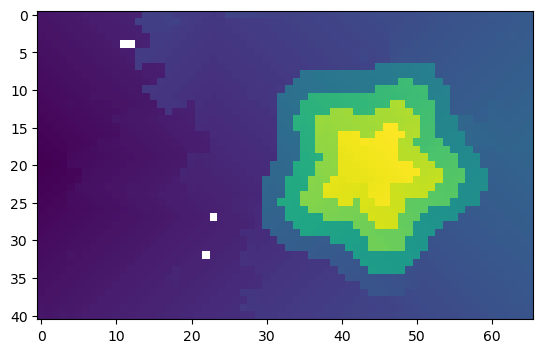

In [1]:
import string
import numpy as np
import matplotlib.pyplot as plt

file = open("data/day-12.txt").read().splitlines()

def p1():
    # create a grid of numbers, where each letter is a number, and S and E are 0 and 27
    mapping = {**{x:i+1 for i, x in enumerate(string.ascii_lowercase)}, **{"S":1, "E":26}}

    letter_graph = np.array([list(x) for x in file])

    # find the start and end points
    start, end = map(lambda x: tuple(np.argwhere(letter_graph == x)[0]), ["S", "E"])

    # convert graph to numbers
    graph = np.array([list(map(lambda x: mapping[x], list(x))) for x in file])

    # create a grid where all values are inf
    optimal_graph = np.zeros_like(graph) + np.inf

    # set optimality for start to 0
    optimal_graph[start] = 0

    # find the neighbors of a point within the grid
    def get_neighbors(node: tuple) -> list:
        x, y = node
        return [(x+1, y), (x-1, y), (x, y+1), (x, y-1)]

    # validate the neighbors of a node
    def validate(node: tuple, neighbors: list) -> list:
        for neighbor in neighbors.copy():
            x, y = neighbor
            # check if out of bounds
            if x < 0 or x >= graph.shape[0] or y < 0 or y >= graph.shape[1]:
                neighbors.remove(neighbor)
            # # check if path exists
            elif graph[x, y] - graph[node] > 1:
                neighbors.remove(neighbor)
            # check if already visited
            elif neighbor in visited:
                neighbors.remove(neighbor)
        return neighbors

    # find optimality for each node
    unvisited = set(); unvisited.add(tuple(start))
    visited = set()
    while(len(unvisited) != 0):
        node = unvisited.pop()
        visited.add(node)
        neighbors = validate(node, get_neighbors(node))
        for neighbor in list(neighbors):
            optimal_graph[neighbor] = min(optimal_graph[neighbor], optimal_graph[node] + 1)
        unvisited.update(neighbors)
    plt.imshow(optimal_graph)
    return optimal_graph[end]
print("Shortest path from S to E is", p1(), "steps long.")

### Puzzle 2
Do the exact same thing as puzzle 1 but start traversing the graph from the end node. We also change the conditions of how nodes are validated. The neighbor's values condition is now reversed. With this, we only run dijkstra once.

For all nodes that are a, the minimum value to reach E is 332.0


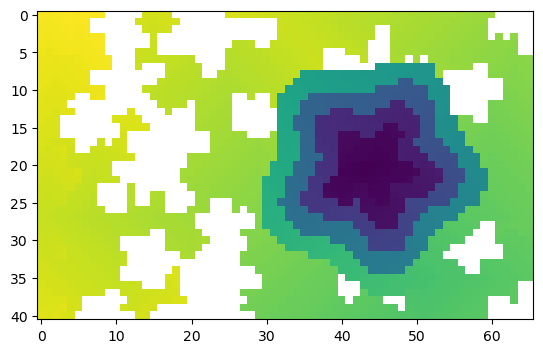

In [2]:
import string
import numpy as np
import matplotlib.pyplot as plt

file = open("data/day-12.txt").read().splitlines()

def p2():
    # create a grid of numbers, where each letter is a number, and S and E are 0 and 27
    mapping = {**{x:i+1 for i, x in enumerate(string.ascii_lowercase)}, **{"S":1, "E":26}}
    inverse_mapping = {v: k for k, v in mapping.items()}

    letter_graph = np.array([list(x) for x in file])

    # define the start of the graph traversal
    start = tuple(np.argwhere(letter_graph == "E")[0])

    # convert graph to numbers
    graph = np.array([list(map(lambda x: mapping[x], list(x))) for x in file])

    # create a grid where all values are inf
    optimal_graph = np.zeros_like(graph) + np.inf

    # set optimality for start to 0
    optimal_graph[start] = 0

    # find the neighbors of a point within the grid
    def get_neighbors(node: tuple) -> list:
        x, y = node
        return [(x+1, y), (x-1, y), (x, y+1), (x, y-1)]

    # validate the neighbors of a node
    def validate(node: tuple, neighbors: list) -> list:
        for neighbor in neighbors.copy():
            x, y = neighbor
            # check if out of bounds
            if x < 0 or x >= graph.shape[0] or y < 0 or y >= graph.shape[1]:
                neighbors.remove(neighbor)
            # # check if path exists
            elif graph[node] - graph[x, y] > 1:
                neighbors.remove(neighbor)
            # check if already visited
            elif neighbor in visited:
                neighbors.remove(neighbor)
        return neighbors

    # find optimality for each node
    unvisited = set(); unvisited.add(tuple(start))
    visited = set()
    while(len(unvisited) != 0):
        node = unvisited.pop()
        visited.add(node)
        neighbors = validate(node, get_neighbors(node))
        for neighbor in list(neighbors):
            optimal_graph[neighbor] = min(optimal_graph[neighbor], optimal_graph[node] + 1)
        unvisited.update(neighbors)
    plt.imshow(optimal_graph)
    # for all nodes that are a, find the minimum value to reach E
    return min([optimal_graph[tuple(x)] for x in np.argwhere(letter_graph == "a")])
print("For all nodes that are a, the minimum value to reach E is", p2())

# Learnings

Today again, I didnt read the solution well enough. I got stuck because I assumed that you could only go one up and one down in terms of neighbor value. But you could go down as much as you would like. So i wasted some time on that. Otherwise today was fun.

# Cleaned up code

In [3]:
import string
import numpy as np

file = open("data/day-12.txt").read().splitlines()

def solver(p1=True):
    def get_neighbors(node: tuple) -> list:
        x, y = node
        return [(x + 1, y), (x - 1, y), (x, y + 1), (x, y - 1)]

    def validate(node: tuple, neighbors: list) -> list:
        for neighbor in neighbors.copy():
            x, y = neighbor
            if (
                (x < 0 or y < 0 or x >= graph.shape[0] or y >= graph.shape[1])
                or (
                    graph[neighbor] - graph[node] > 1
                    if p1
                    else graph[node] - graph[x, y] > 1
                )
                or (neighbor in visited)
            ):
                neighbors.remove(neighbor)
        return neighbors

    mapping = {
        **{x: i + 1 for i, x in enumerate(string.ascii_lowercase)},
        **{"S": 1, "E": 26},
    }

    l_graph = np.array([list(x) for x in file])
    graph = np.array([list(map(lambda x: mapping[x], list(x))) for x in file])
    start_end_letters = ["S", "E"] if p1 else ["E", "a"]
    start, end = map(lambda x: tuple(np.argwhere(l_graph == x)[0]), start_end_letters)

    opt_graph = np.zeros_like(graph) + np.inf
    opt_graph[start] = 0

    visited, unvisited = set(), set()
    unvisited.add(tuple(start))
    while len(unvisited) != 0:
        node = unvisited.pop()
        visited.add(node)
        neighbors = validate(node, get_neighbors(node))
        for neighbor in list(neighbors):
            opt_graph[neighbor] = min(opt_graph[neighbor], opt_graph[node] + 1)
        unvisited.update(neighbors)
    return (
        opt_graph[end]
        if p1
        else min([opt_graph[tuple(x)] for x in np.argwhere(l_graph == "a")])
    )


print("P1 solution", solver(p1=True))
print("P2 solution", solver(p1=False))


P1 solution 339.0
P2 solution 332.0


# Runtimes

8.97 ms ± 175 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


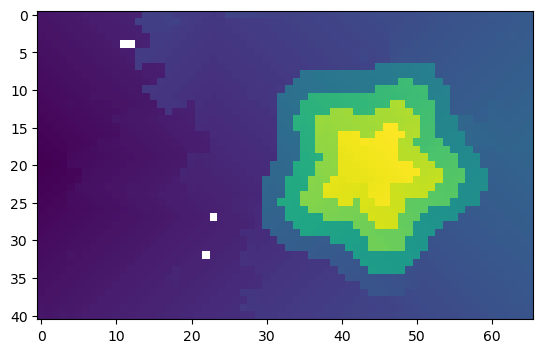

In [4]:
%%timeit
p1()

7.05 ms ± 84.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


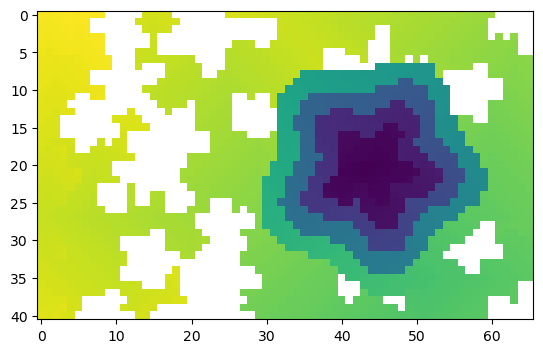

In [5]:
%%timeit
p2()